## 1.Data Cleaning and Preparation:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Dell\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df= pd.read_csv('Cardiotocographic.csv')

In [5]:
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [6]:
## missing values
df.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [7]:
## total 2126 rows , low percentage of missing values so dropping will not affect the analysis.

In [8]:
## handling missing values by replacing it with mean
df.fillna(df.mean(),inplace=True)

In [9]:
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [10]:
df.dtypes

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

In [11]:
## Detect outliers and remove outliers

In [12]:
##using IQR method 
outliers_summary={} 

for col in df.columns:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1

    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR

    ##identifying outliers
    outlier_mask=(df[col]<lower_bound)|(df[col]>upper_bound)  
    outliers=df[col][outlier_mask] 
    
    outliers_summary[col]=outliers 
    print(f"the number of outliers in {col} is {len(outliers)}") 

the number of outliers in LB is 10
the number of outliers in AC is 43
the number of outliers in FM is 347
the number of outliers in UC is 13
the number of outliers in DL is 125
the number of outliers in DS is 141
the number of outliers in DP is 305
the number of outliers in ASTV is 10
the number of outliers in MSTV is 80
the number of outliers in ALTV is 318
the number of outliers in MLTV is 81
the number of outliers in Width is 10
the number of outliers in Tendency is 10
the number of outliers in NSP is 580


## 2.Statistical Summary:

In [13]:
stat_summary=df.describe()
IQR=df.quantile(0.75)-df.quantile(0.25)
stat_summary.loc['IQR']=IQR
print(stat_summary)

                LB           AC           FM           UC           DL  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean    133.343598     0.003219     0.009894     0.004391     0.001895   
std      11.214328     0.004370     0.067540     0.003340     0.003343   
min      51.842487    -0.019284    -0.480634    -0.014925    -0.015393   
25%     126.000000     0.000000     0.000000     0.001851     0.000000   
50%     133.000000     0.001668     0.000000     0.004484     0.000000   
75%     140.000000     0.005606     0.002567     0.006536     0.003289   
max     214.000000     0.038567     0.961268     0.030002     0.030769   
IQR      14.000000     0.005606     0.002567     0.004685     0.003289   

                DS           DP         ASTV         MSTV         ALTV  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean      0.000003     0.000175    46.995984     1.364378    10.285964   
std       0.000141     0.000836    18

## 3.Data Visualization:

# HISTOGRAM

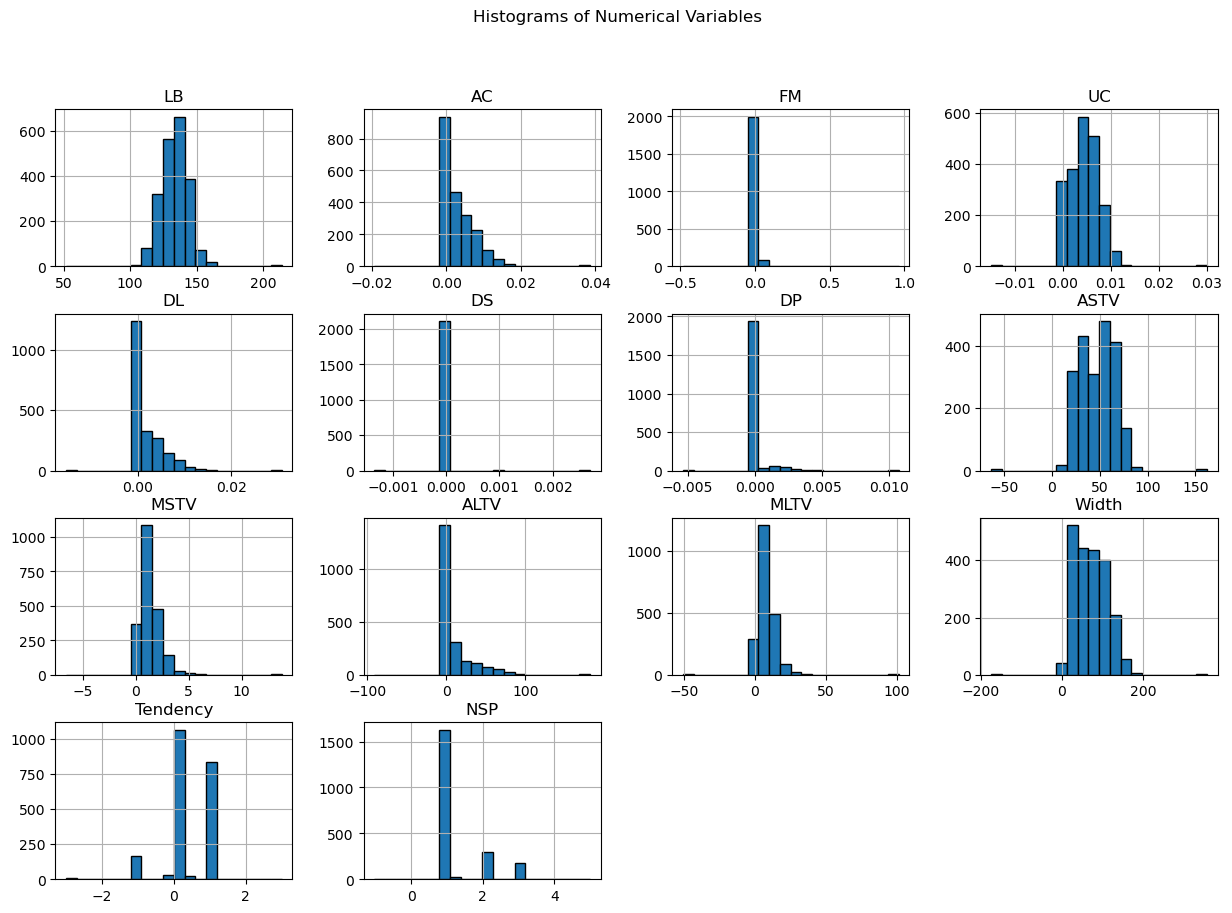

In [14]:
## Histogram for each numerical variable
df.hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle('Histograms of Numerical Variables')
plt.show()

# Bar Chart

In [15]:
# Bar chart for categorical variables
df.columns
cat_col= [ i for i in df.columns if df[i].dtype=='O']
cat_col

[]

In [16]:
## there is no categorical values.So it cannot be plotted.

# Scatter Plot

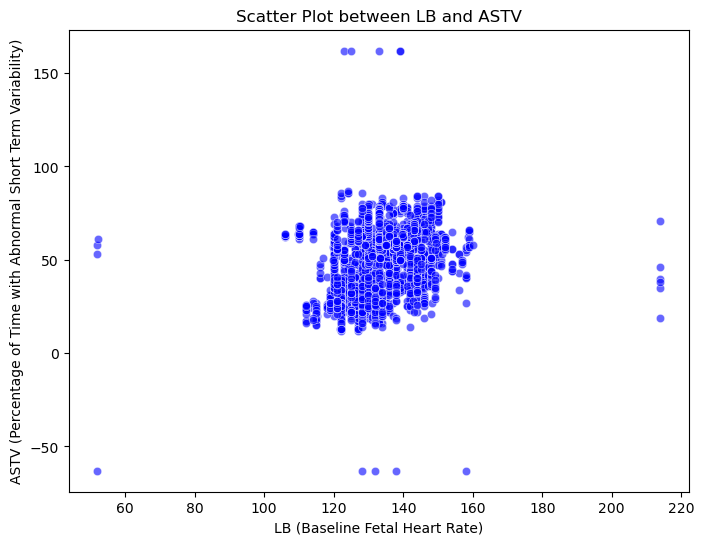

In [17]:
# Scatter plot between two specific variables (e.g., 'LB' and 'ASTV')
plt.figure(figsize=(8, 6))
sns.scatterplot(x='LB', y='ASTV', data=df, color="blue", alpha=0.6)
plt.title("Scatter Plot between LB and ASTV")
plt.xlabel("LB (Baseline Fetal Heart Rate)")
plt.ylabel("ASTV (Percentage of Time with Abnormal Short Term Variability)")
plt.show()

# Correlation Heatmaps 

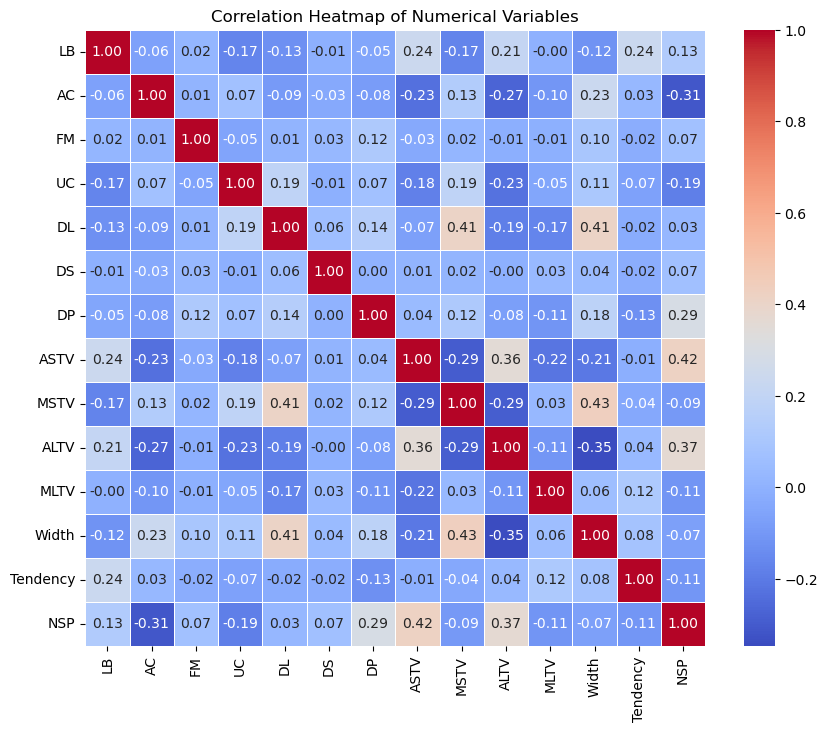

In [18]:
# Correlation heatmap for all numerical variables
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()  # Compute correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

# Pair Plot

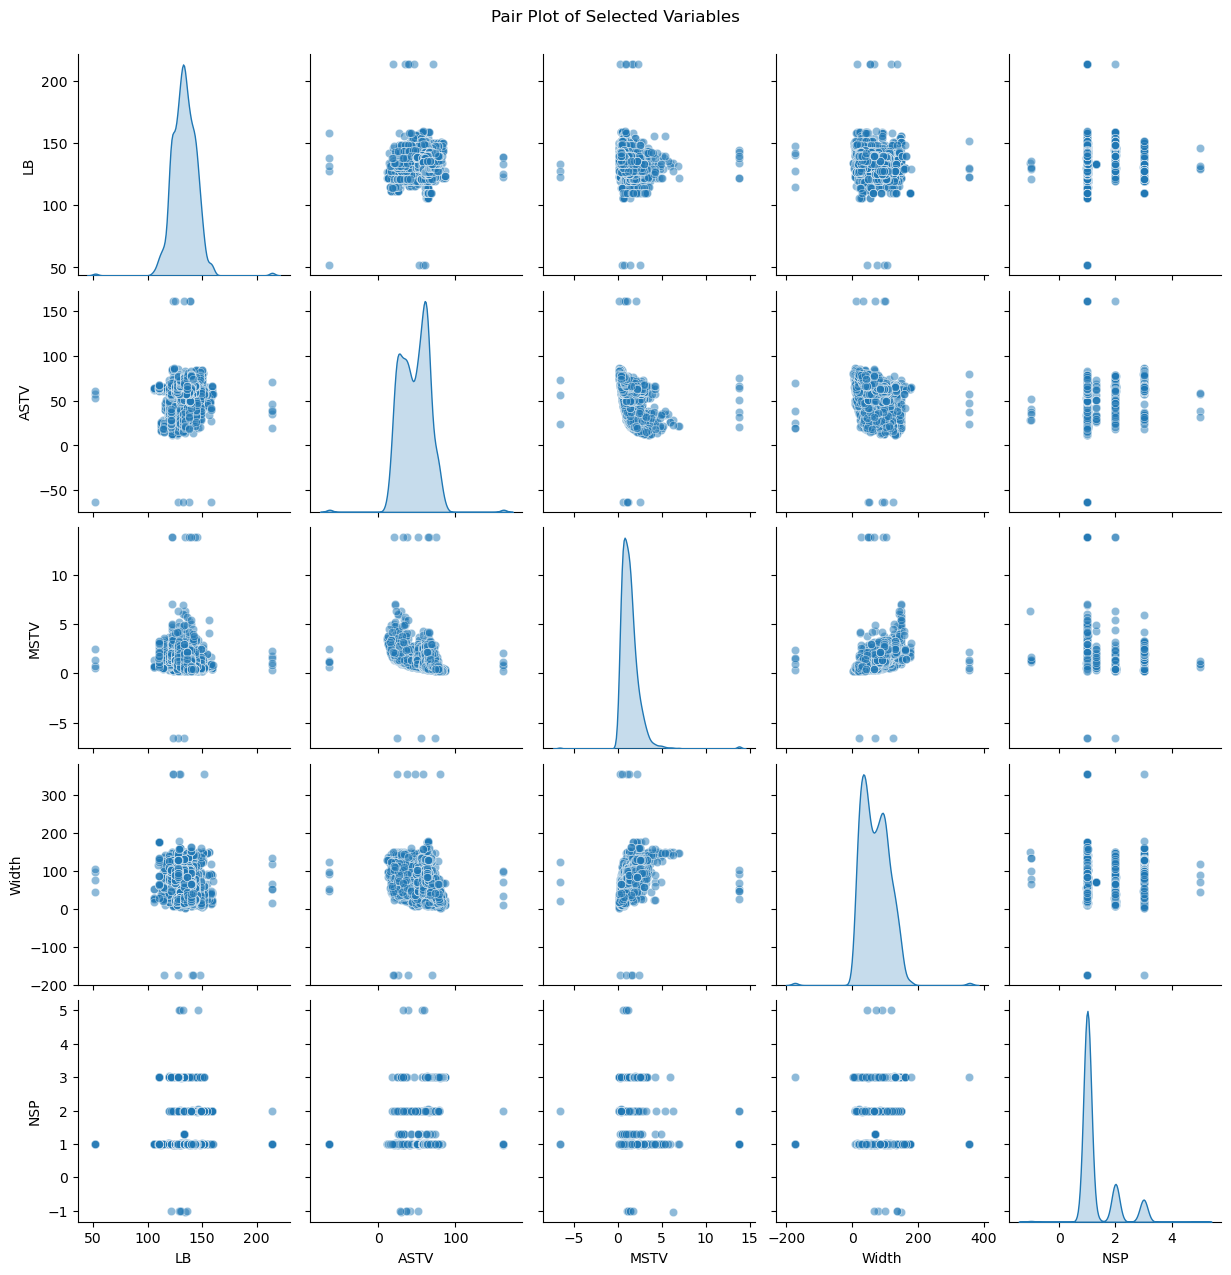

In [19]:
sns.pairplot(df[['LB', 'ASTV', 'MSTV', 'Width', 'NSP']], diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle("Pair Plot of Selected Variables", y=1.02)
plt.show()

## 4.Pattern Recognition and Insights:

In [20]:
#Identify correlations between variables
corr_matrix = df.corr()
print("Correlations between variables:")
print(corr_matrix)

Correlations between variables:
                LB        AC        FM        UC        DL        DS  \
LB        1.000000 -0.062839  0.018776 -0.166201 -0.126536 -0.005438   
AC       -0.062839  1.000000  0.009432  0.071863 -0.093196 -0.033101   
FM        0.018776  0.009432  1.000000 -0.053226  0.009718  0.029899   
UC       -0.166201  0.071863 -0.053226  1.000000  0.190128 -0.006922   
DL       -0.126536 -0.093196  0.009718  0.190128  1.000000  0.058430   
DS       -0.005438 -0.033101  0.029899 -0.006922  0.058430  1.000000   
DP       -0.047724 -0.083277  0.121274  0.070501  0.144940  0.004285   
ASTV      0.241857 -0.230439 -0.032691 -0.181161 -0.069361  0.008425   
MSTV     -0.169561  0.133649  0.017055  0.189406  0.410102  0.016077   
ALTV      0.210446 -0.271041 -0.011936 -0.227304 -0.186967 -0.004392   
MLTV     -0.003457 -0.104875 -0.006237 -0.049351 -0.165198  0.034349   
Width    -0.118425  0.234735  0.097204  0.107159  0.408664  0.040832   
Tendency  0.236864  0.031977 -0.

## 5.Conclusion:

Key Insights and Patterns:

Implications for Decision-Making and Further Analysis:

In [ ]:
.Addressing data variability and outliers is essential to improve model accuracy and reliability. 

.Identified correlations can guide further studies on fetal heart rate patterns, while investigating negative values and outliers will enhance data quality for predictive and diagnostic purposes.